#1)Use decision trees to prepare a model on fraud data treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

##Data Description :

###Undergrad : person is under graduated or not
###Marital.Status : marital status of a person
###Taxable.Income : Taxable income is the amount of how much tax an individual ###owes to the government
###Work Experience : Work experience of an individual person
###Urban : Whether that person belongs to urban area or not


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Fraud_check.csv to Fraud_check.csv


In [ ]:
df = pd.read_csv("Fraud_check.csv")
df.head()

Undergrad Marital.Status  Taxable.Income  City.Population  Work.Experience  \
0        NO         Single           68833            50047               10   
1       YES       Divorced           33700           134075               18   
2        NO        Married           36925           160205               30   
3       YES         Single           50190           193264               15   
4        NO        Married           81002            27533               28   

  Urban  
0   YES  
1   YES  
2   YES  
3   YES  
4    NO

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [ ]:
df.describe()

Taxable.Income  City.Population  Work.Experience
count      600.000000       600.000000       600.000000
mean     55208.375000    108747.368333        15.558333
std      26204.827597     49850.075134         8.842147
min      10003.000000     25779.000000         0.000000
25%      32871.500000     66966.750000         8.000000
50%      55074.500000    106493.500000        15.000000
75%      78611.750000    150114.250000        24.000000
max      99619.000000    199778.000000        30.000000

In [ ]:
#Creating dummy vairables for ['Undergrad','Marital.Status','Urban'] dropping first dummy variable
df=pd.get_dummies(df,columns=['Undergrad','Marital.Status','Urban'], drop_first=True)

In [ ]:
#Creating new cols TaxInc and dividing 'Taxable.Income' cols on the basis of [10002,30000,99620] for Risky and Good
df["TaxInc"] = pd.cut(df["Taxable.Income"], bins = [10002,30000,99620], labels = ["Risky", "Good"])

In [ ]:
print(df)

     Taxable.Income  City.Population  Work.Experience  Undergrad_YES  \
0             68833            50047               10              0   
1             33700           134075               18              1   
2             36925           160205               30              0   
3             50190           193264               15              1   
4             81002            27533               28              0   
..              ...              ...              ...            ...   
595           76340            39492                7              1   
596           69967            55369                2              1   
597           47334           154058                0              0   
598           98592           180083               17              1   
599           96519           158137               16              0   

     Marital.Status_Married  Marital.Status_Single  Urban_YES TaxInc  
0                         0                      1          1   

####Lets assume: taxable_income <= 30000 as “Risky=0” and others are “Good=1”

In [ ]:
#After creation of new col. TaxInc also made its dummies var concating right side of df

df = pd.get_dummies(df,columns = ["TaxInc"],drop_first=True)

In [ ]:
#Viewing buttom 10 observations

df.tail(10)

Taxable.Income  City.Population  Work.Experience  Undergrad_YES  \
590           43018            85195               14              0   
591           27394           132859               18              1   
592           68152            75143               16              1   
593           84775           131963               10              0   
594           47364            97526                9              0   
595           76340            39492                7              1   
596           69967            55369                2              1   
597           47334           154058                0              0   
598           98592           180083               17              1   
599           96519           158137               16              0   

     Marital.Status_Married  Marital.Status_Single  Urban_YES  TaxInc_Good  
590                       1                      0          1            1  
591                       0                      1          1            0  
592                       0                      1          0            1  
593                       0                      0          1            1  
594                       1                      0          1            1  
595                       0                      0          1            1  
596                       0                      0          1            1  
597                       0                      0          1            1  
598                       1                      0          0            1  
599                       0                      0          0            1

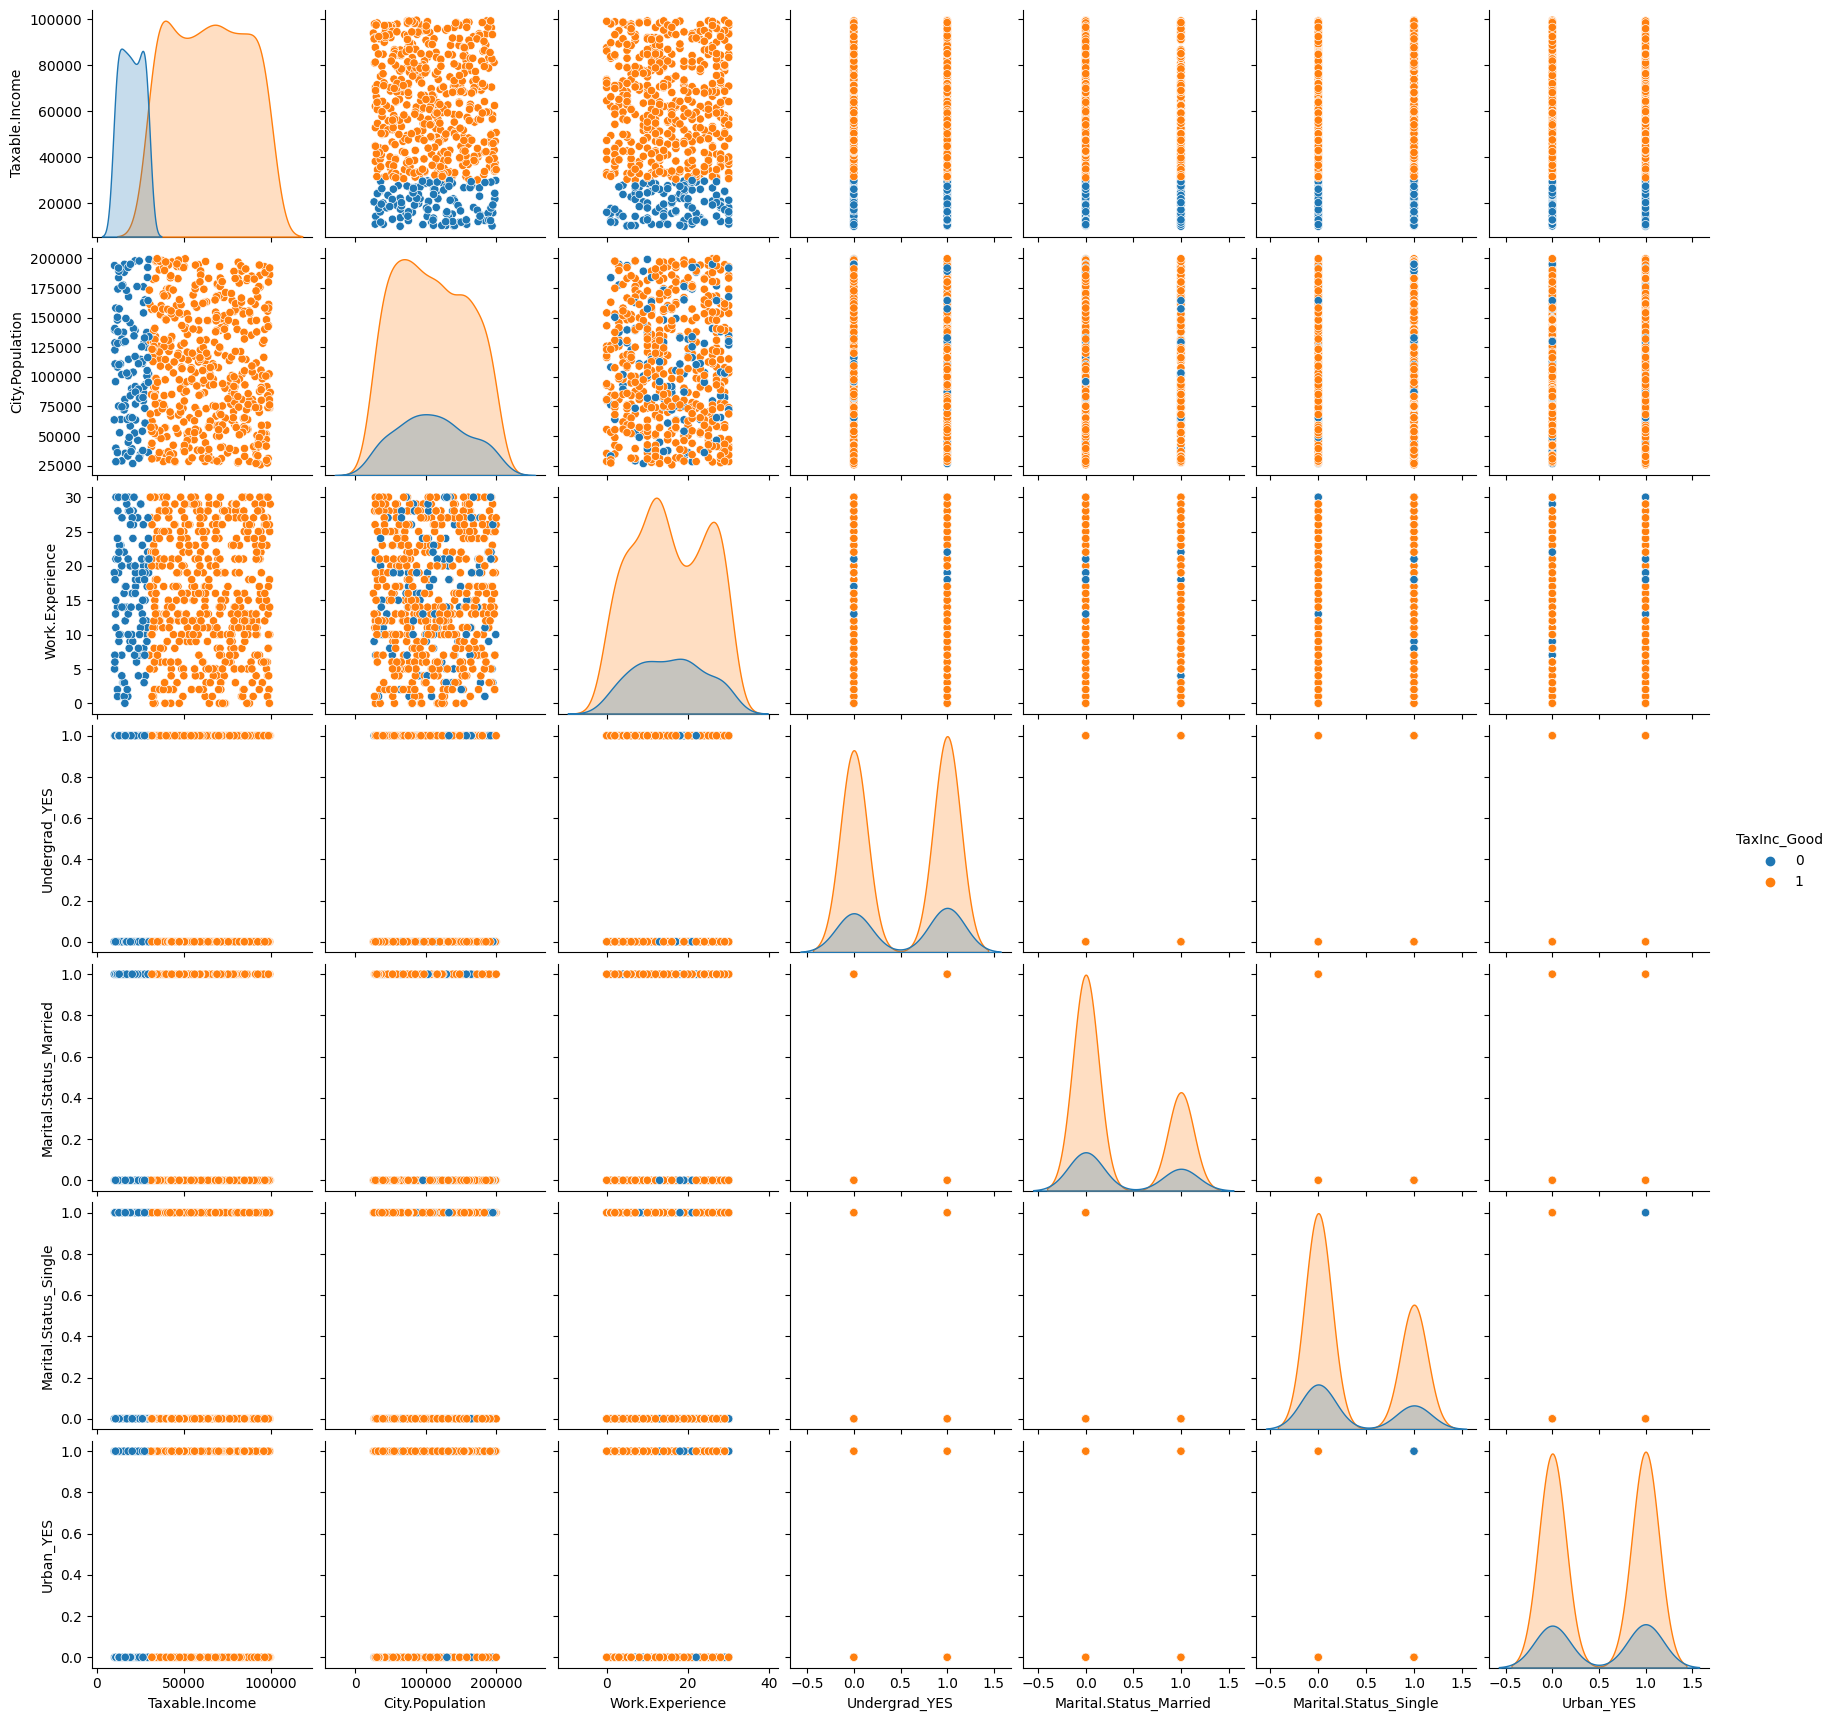

In [ ]:
# let's plot pair plot to visualise the attributes all at once
import seaborn as sns
sns.pairplot(data=df, hue = 'TaxInc_Good')

In [ ]:
# Normalization function
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [ ]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(df.iloc[:,1:])
df_norm.tail(10)

City.Population  Work.Experience  Undergrad_YES  Marital.Status_Married  \
590         0.341473         0.466667            0.0                     1.0   
591         0.615406         0.600000            1.0                     0.0   
592         0.283703         0.533333            1.0                     0.0   
593         0.610256         0.333333            0.0                     0.0   
594         0.412341         0.300000            0.0                     1.0   
595         0.078811         0.233333            1.0                     0.0   
596         0.170058         0.066667            1.0                     0.0   
597         0.737240         0.000000            0.0                     0.0   
598         0.886810         0.566667            1.0                     1.0   
599         0.760683         0.533333            0.0                     0.0   

     Marital.Status_Single  Urban_YES  TaxInc_Good  
590                    0.0        1.0          1.0  
591                    1.0        1.0          0.0  
592                    1.0        0.0          1.0  
593                    0.0        1.0          1.0  
594                    0.0        1.0          1.0  
595                    0.0        1.0          1.0  
596                    0.0        1.0          1.0  
597                    0.0        1.0          1.0  
598                    0.0        0.0          1.0  
599                    0.0        0.0          1.0

In [ ]:
# Declaring features & target
X = df_norm.drop(['TaxInc_Good'], axis=1)
y = df_norm['TaxInc_Good']

In [ ]:
from sklearn.model_selection import train_test_split
# Splitting data into train & test

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
##Converting the Taxable income variable to bucketing.
df_norm["income"]="<=30000"
df_norm.loc[df["Taxable.Income"]>=30000,"income"]="Good"
df_norm.loc[df["Taxable.Income"]<=30000,"income"]="Risky"

In [ ]:
##Droping the Taxable income variable
df.drop(["Taxable.Income"],axis=1,inplace=True)

In [ ]:
df.rename(columns={"Undergrad":"undergrad","Marital.Status":"marital","City.Population":"population","Work.Experience":"experience","Urban":"urban"},inplace=True)
## As we are getting error as "ValueError: could not convert string to float: 'YES'".
## Model.fit doesnt not consider String. So, we encode

In [ ]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
for column_name in df.columns:
    if df[column_name].dtype == object:
        df[column_name] = le.fit_transform(df[column_name])
    else:
        pass

In [ ]:
##Splitting the data into featuers and labels
features = df.iloc[:,0:5]
labels = df.iloc[:,5]

In [ ]:
## Collecting the column names
colnames = list(df.columns)
predictors = colnames[0:5]
target = colnames[5]
##Splitting the data into train and test

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(features,labels,test_size = 0.2,stratify = labels)

In [ ]:
##Model building
from sklearn.ensemble import RandomForestClassifier as RF
model = RF(n_jobs = 3,n_estimators = 15, oob_score = True, criterion = "entropy")
model.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=15, n_jobs=3,
                       oob_score=True)

In [ ]:
model.estimators_
model.classes_
#model.n_features_
model.n_classes_

2

In [ ]:
model.n_outputs_

1

In [ ]:
model.oob_score_
###74.7833%

0.5270833333333333

In [ ]:
##Predictions on train data
prediction = model.predict(x_train)

In [ ]:
##Accuracy
# For accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_train,prediction)
##98.33%

In [ ]:
np.mean(prediction == y_train)
##98.33%

0.9729166666666667

In [ ]:
##Confusion matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_train,prediction)

In [ ]:
##Prediction on test data
pred_test = model.predict(x_test)

In [ ]:
##Accuracy
acc_test =accuracy_score(y_test,pred_test)
##78.333%

In [ ]:
## In random forest we can plot a Decision tree present in Random forest
from sklearn.tree import export_graphviz
import pydotplus
from six import StringIO

In [ ]:
tree = model.estimators_[5]

In [ ]:
dot_data = StringIO()
export_graphviz(tree,out_file = dot_data, filled = True,rounded = True, feature_names = predictors ,class_names = target,impurity =False)


In [ ]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

###Building Decision Tree Classifier using Entropy Criteria

In [ ]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

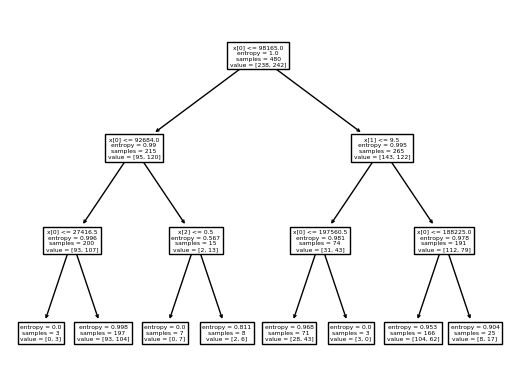

In [ ]:
from sklearn import tree
#PLot the decision tree
tree.plot_tree(model);

In [ ]:
colnames = list(df.columns)
colnames

['population',
 'experience',
 'Undergrad_YES',
 'Marital.Status_Married',
 'Marital.Status_Single',
 'Urban_YES',
 'TaxInc_Good']

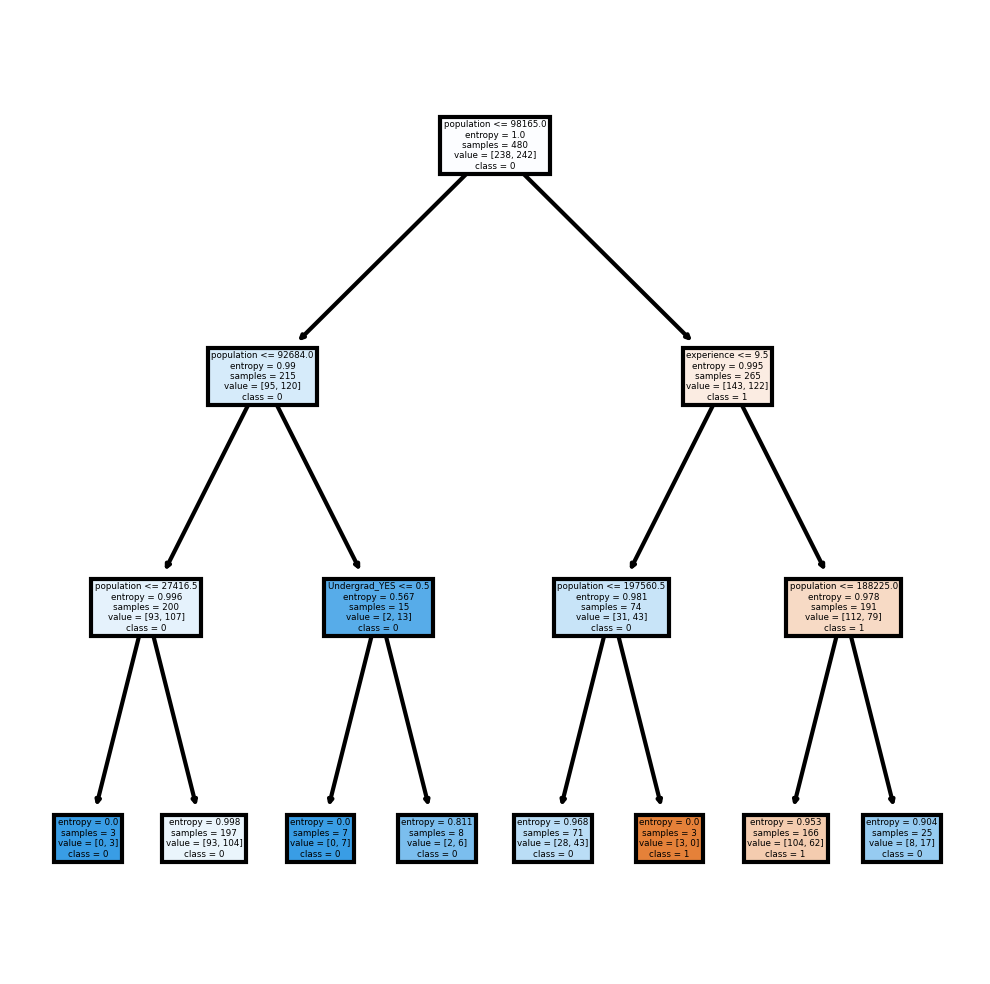

In [ ]:
fn=['population','experience','Undergrad_YES','Marital.Status_Married','Marital.Status_Single','Urban_YES']
cn=['1', '0']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn,
               class_names=cn,
               filled = True);

In [ ]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set
pd.Series(preds).value_counts() # getting the count of each category

1    76
0    44
dtype: int64

In [ ]:
preds

array([0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1], dtype=uint8)

In [ ]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0       0   1
Urban_YES        
0          22  38
1          22  38

In [ ]:
# Accuracy
np.mean(preds==y_test)

0.5

###Building Decision Tree Classifier (CART) using Gini Criteria

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [ ]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [ ]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test)

0.5

###Decision Tree Regression Example

In [ ]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [ ]:
array = df.values
X = array[:,0:3]
y = array[:,3]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [ ]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
#Find the accuracy
model.score(X_test,y_test)

-0.9162779850746272

#2)Problem Statement:

##A cloth manufacturing company is interested to know about the segment or attributes causes high sale.

##Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  

###About the data:

###Let’s consider a Company dataset with around 10 variables and 400 records.
###The attributes are as follows:
### Sales -- Unit sales (in thousands) at each location
### Competitor Price -- Price charged by competitor at each location
### Income -- Community income level (in thousands of dollars)
### Advertising -- Local advertising budget for company at each location (in thousands of dollars)
### Population -- Population size in region (in thousands)
### Price -- Price company charges for car seats at each site
### Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
### Age -- Average age of the local population
### Education -- Education level at each location
### Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location
### US -- A factor with levels No and Yes to indicate whether the store is in the US or not
###The company dataset looks like this:


In [ ]:
#importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Company_Data.csv to Company_Data.csv


In [ ]:
df2 = pd.read_csv("Company_Data.csv")
df2.head()

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US  
0         17   Yes  Yes  
1         10   Yes  Yes  
2         12   Yes  Yes  
3         14   Yes  Yes  
4         13   Yes   No

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [ ]:
df2.describe()

Sales   CompPrice      Income  Advertising  Population  \
count  400.000000  400.000000  400.000000   400.000000  400.000000   
mean     7.496325  124.975000   68.657500     6.635000  264.840000   
std      2.824115   15.334512   27.986037     6.650364  147.376436   
min      0.000000   77.000000   21.000000     0.000000   10.000000   
25%      5.390000  115.000000   42.750000     0.000000  139.000000   
50%      7.490000  125.000000   69.000000     5.000000  272.000000   
75%      9.320000  135.000000   91.000000    12.000000  398.500000   
max     16.270000  175.000000  120.000000    29.000000  509.000000   

            Price         Age   Education  
count  400.000000  400.000000  400.000000  
mean   115.795000   53.322500   13.900000  
std     23.676664   16.200297    2.620528  
min     24.000000   25.000000   10.000000  
25%    100.000000   39.750000   12.000000  
50%    117.000000   54.500000   14.000000  
75%    131.000000   66.000000   16.000000  
max    191.000000   80.000000   18.000000

In [ ]:
df2.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [ ]:
df2.corr()

<ipython-input-8-e0c6714eb3b3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df2.corr()


Sales  CompPrice    Income  Advertising  Population     Price  \
Sales        1.000000   0.064079  0.151951     0.269507    0.050471 -0.444951   
CompPrice    0.064079   1.000000 -0.080653    -0.024199   -0.094707  0.584848   
Income       0.151951  -0.080653  1.000000     0.058995   -0.007877 -0.056698   
Advertising  0.269507  -0.024199  0.058995     1.000000    0.265652  0.044537   
Population   0.050471  -0.094707 -0.007877     0.265652    1.000000 -0.012144   
Price       -0.444951   0.584848 -0.056698     0.044537   -0.012144  1.000000   
Age         -0.231815  -0.100239 -0.004670    -0.004557   -0.042663 -0.102177   
Education   -0.051955   0.025197 -0.056855    -0.033594   -0.106378  0.011747   

                  Age  Education  
Sales       -0.231815  -0.051955  
CompPrice   -0.100239   0.025197  
Income      -0.004670  -0.056855  
Advertising -0.004557  -0.033594  
Population  -0.042663  -0.106378  
Price       -0.102177   0.011747  
Age          1.000000   0.006488  
Education    0.006488   1.000000

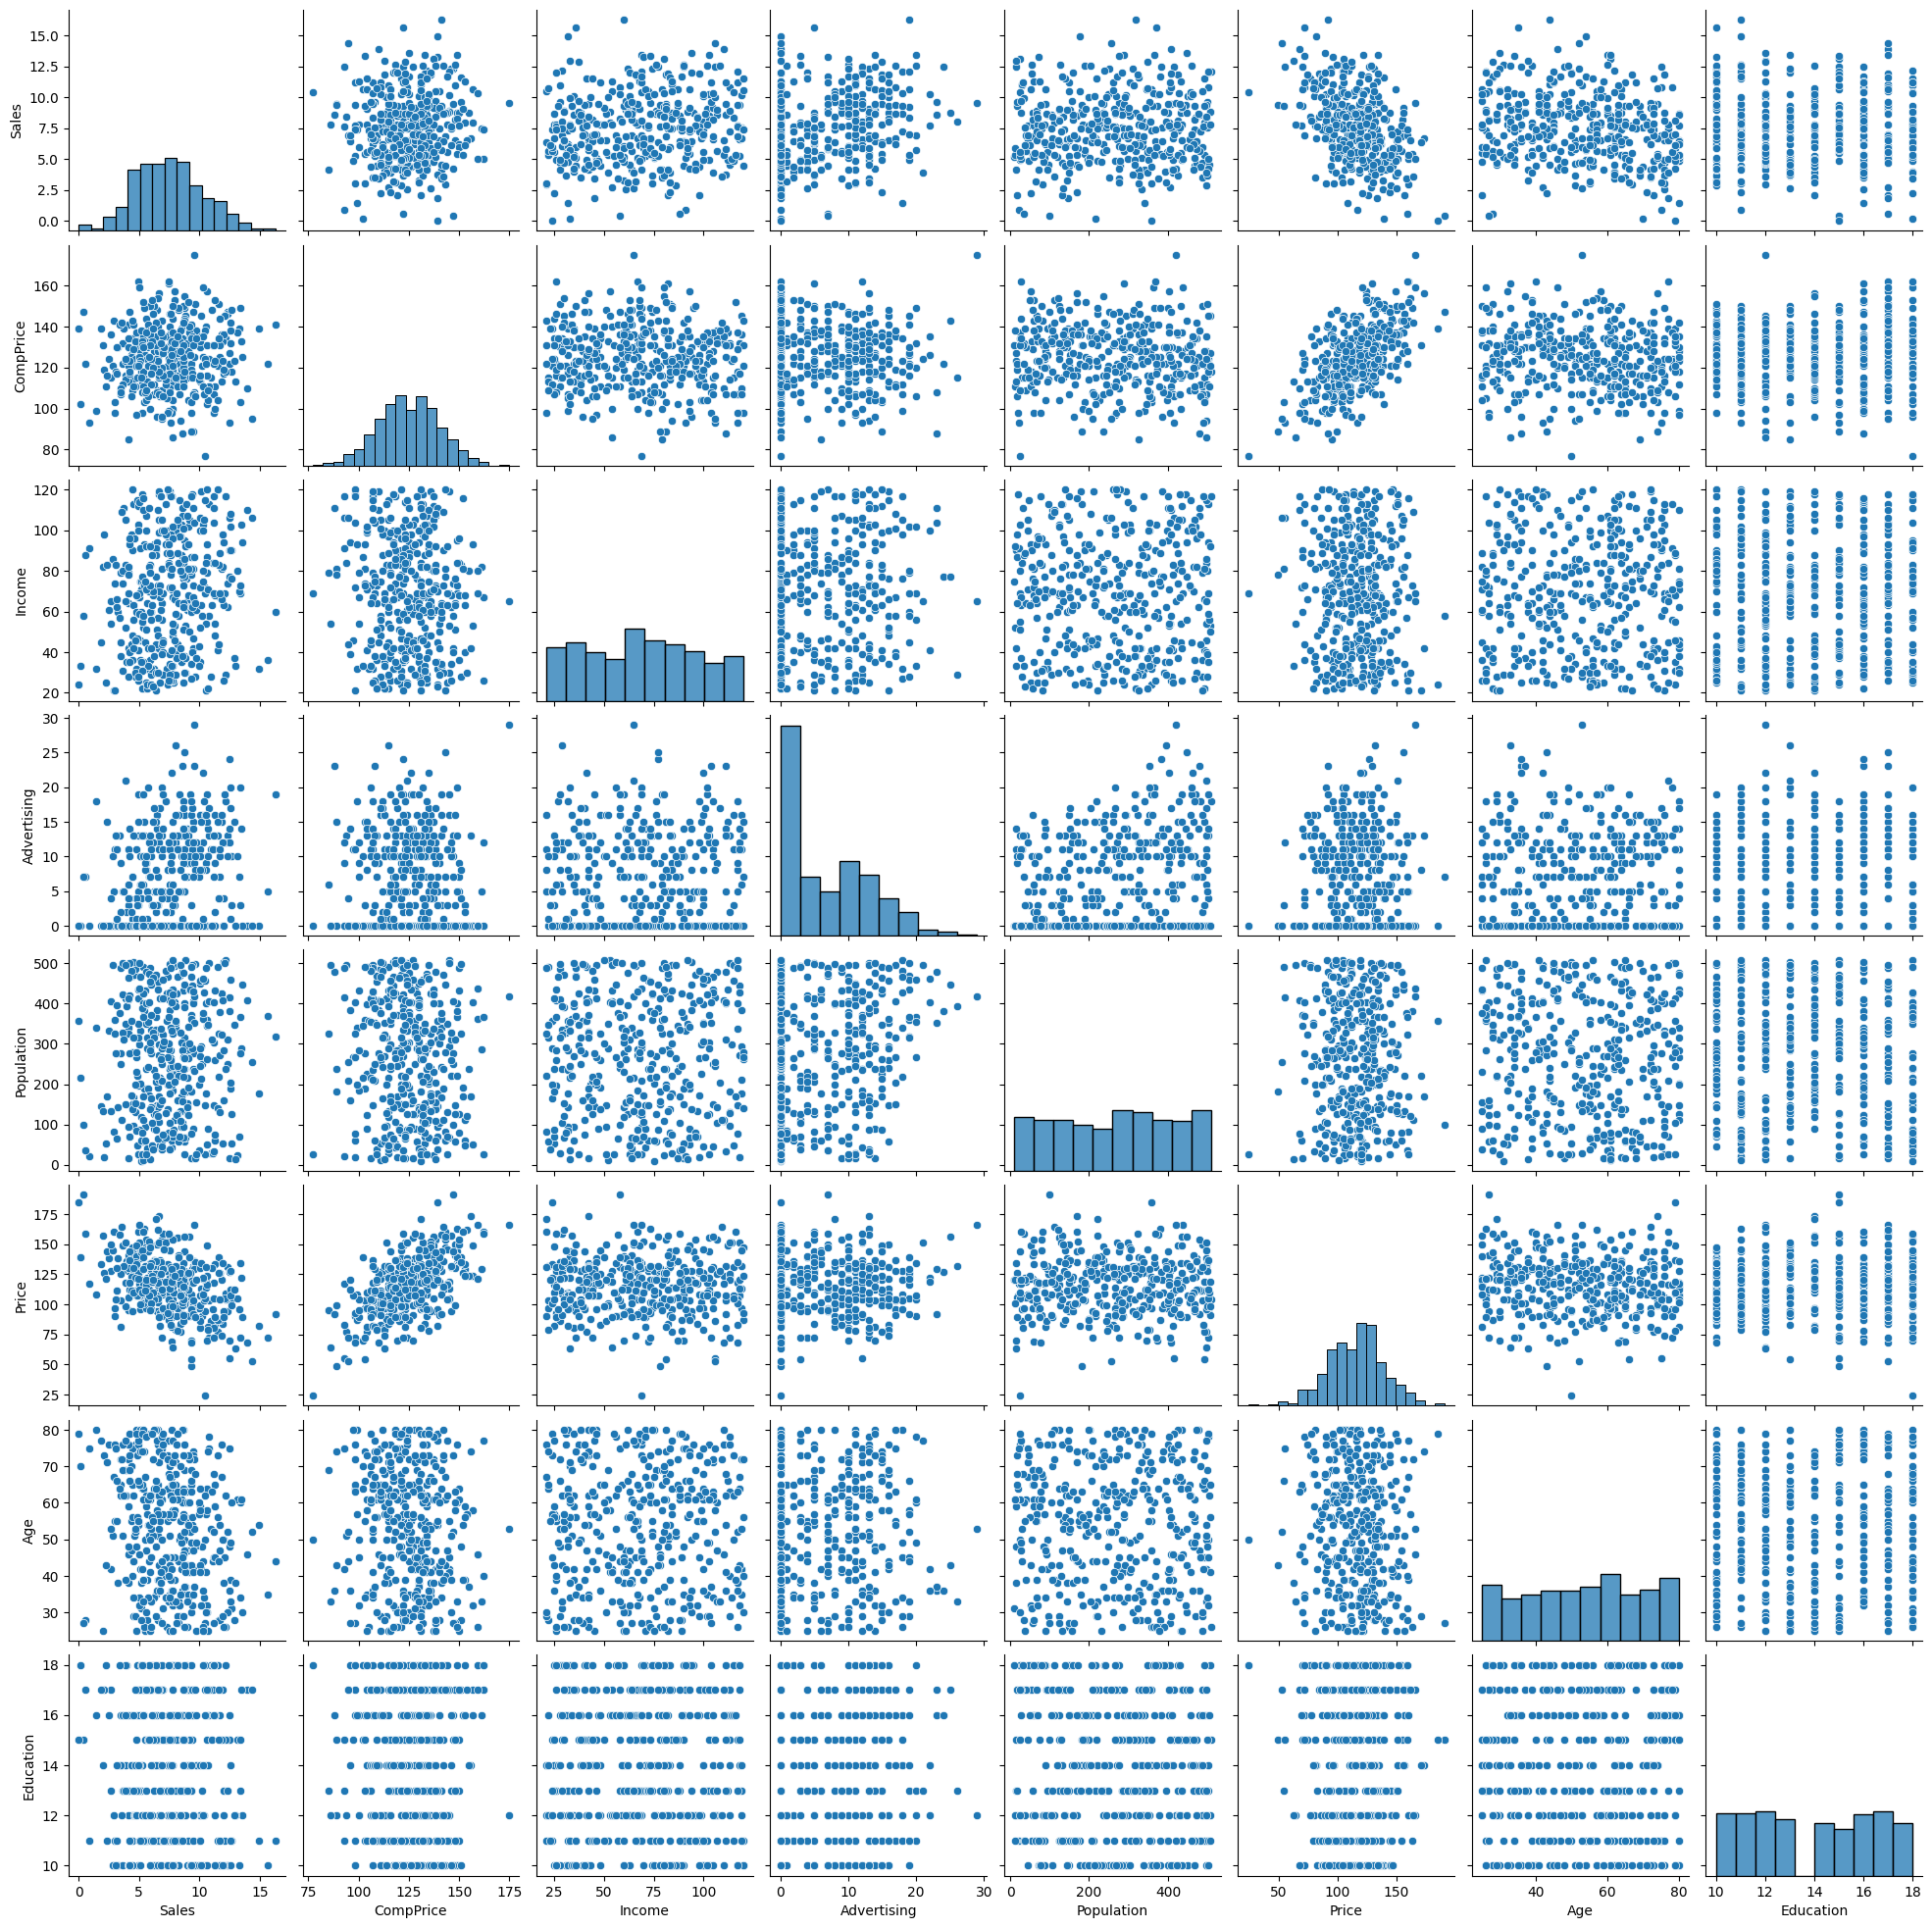

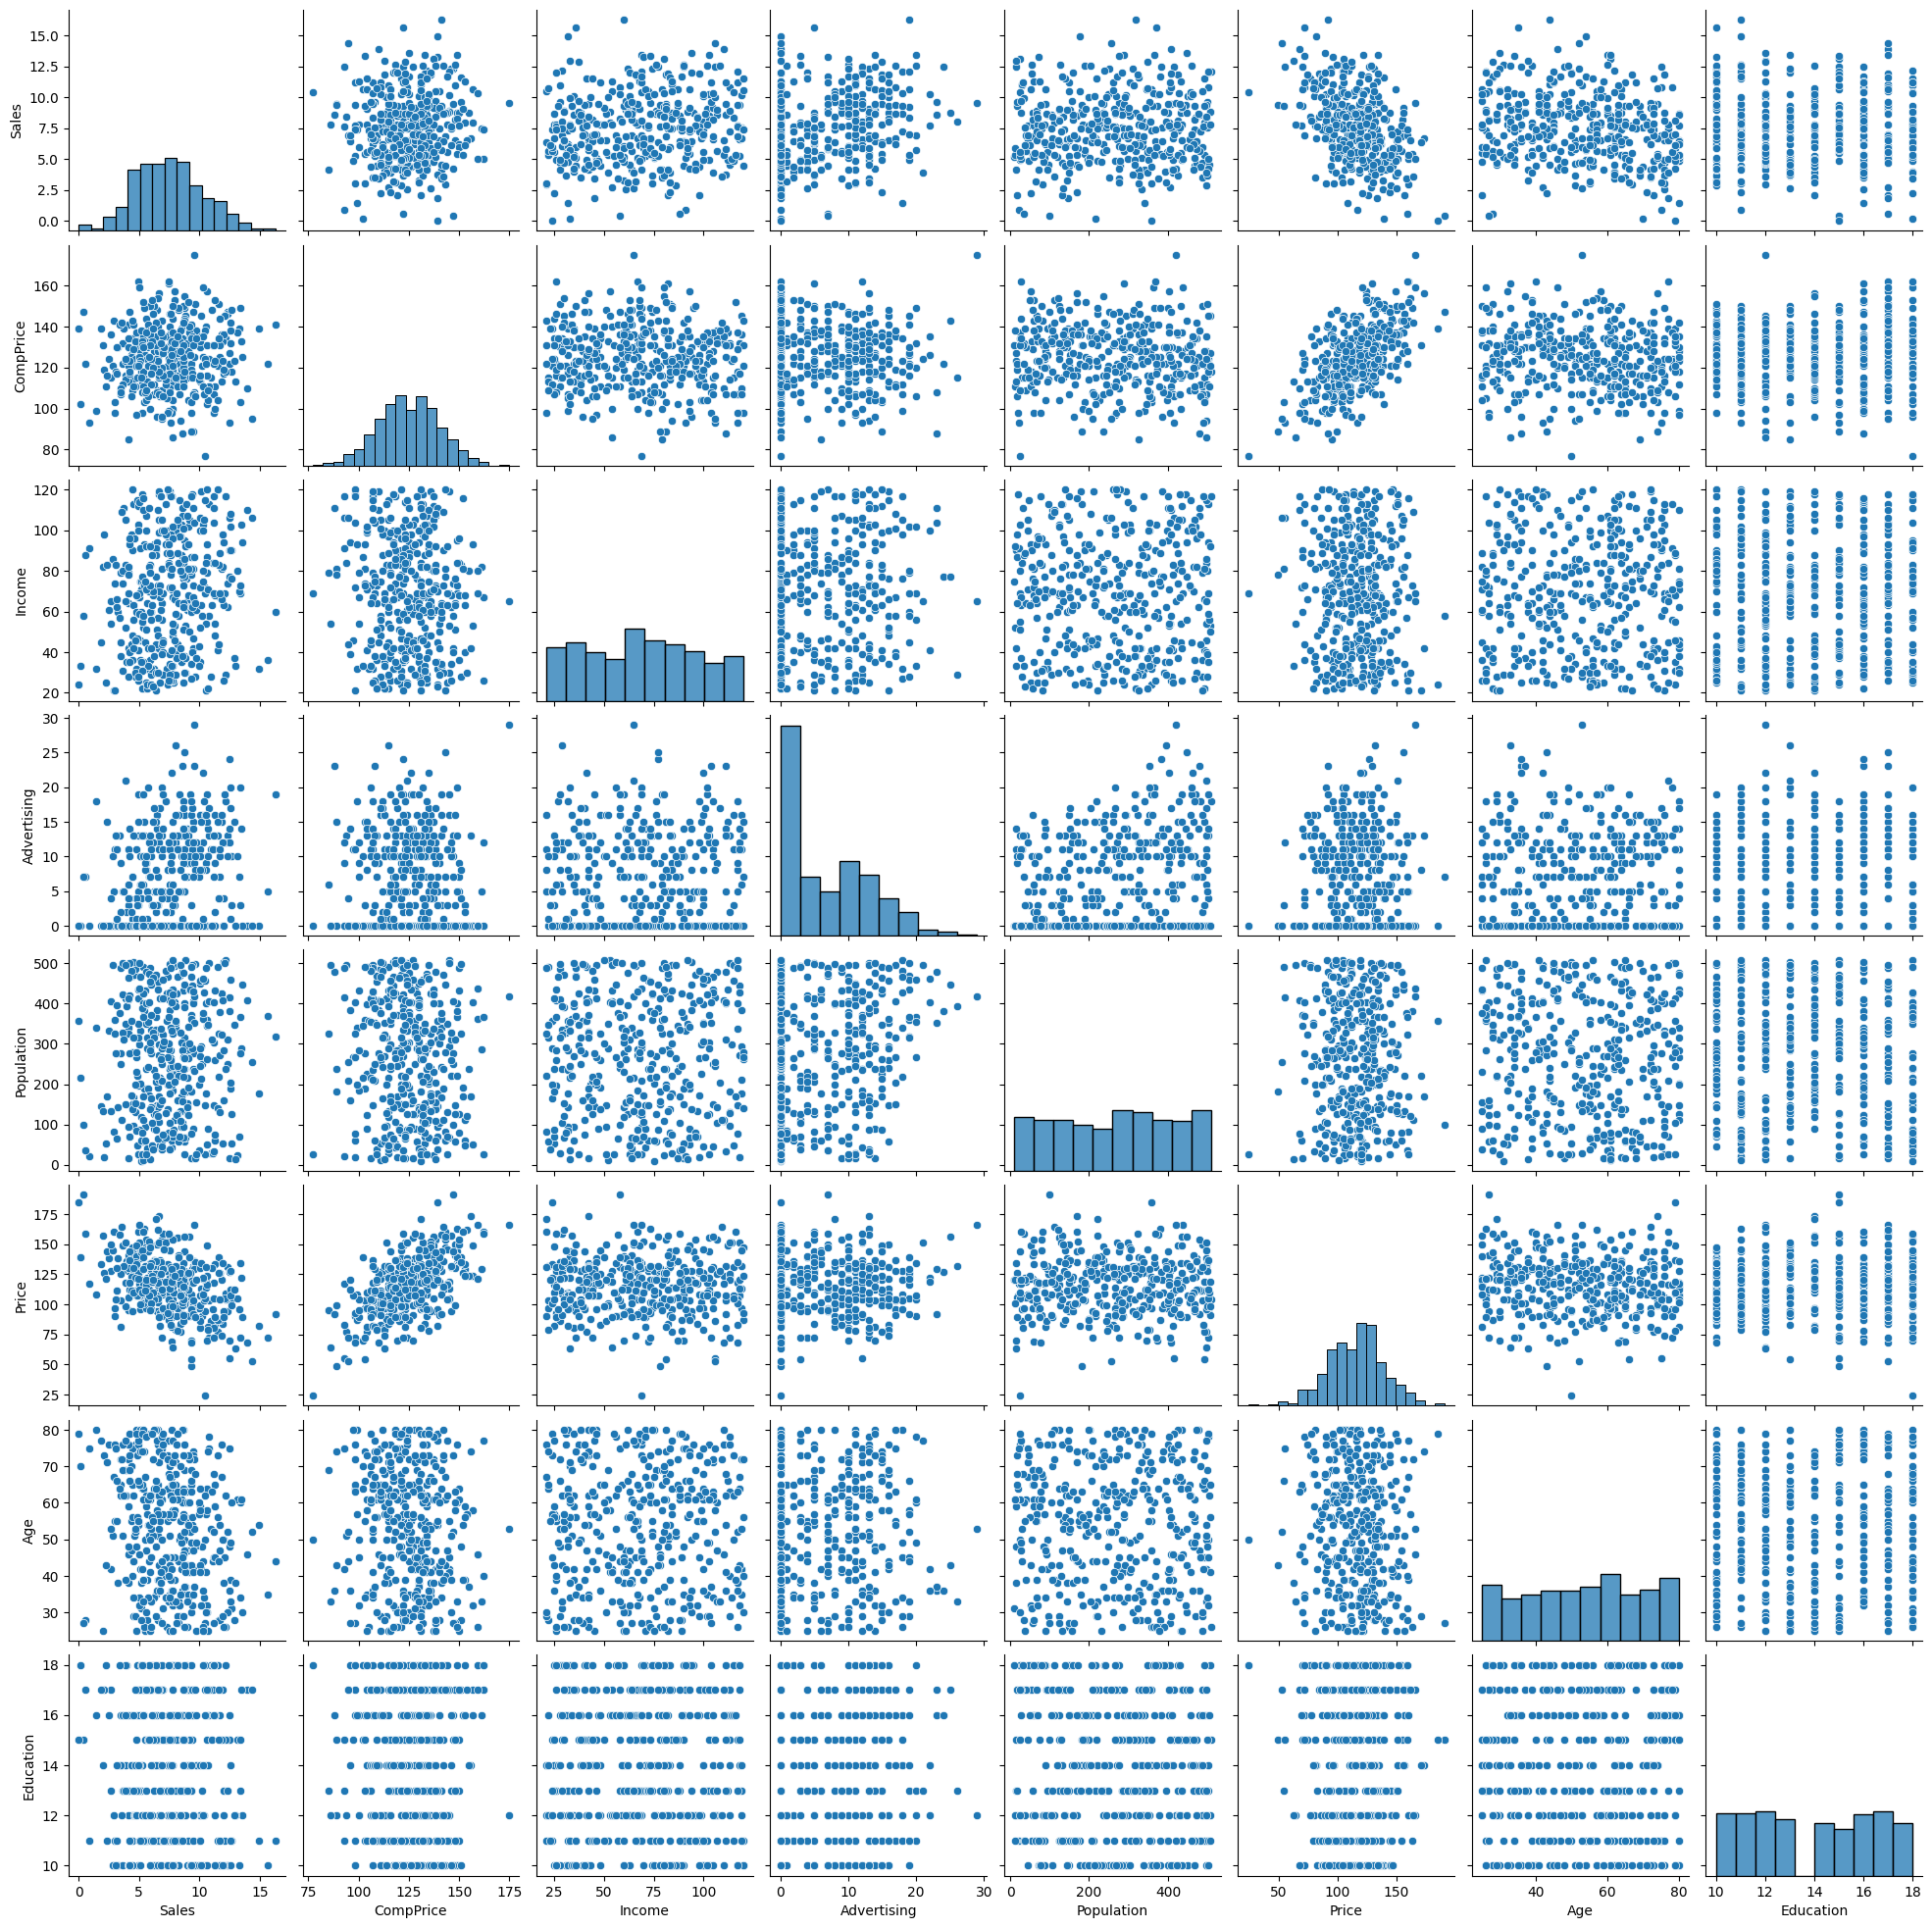

In [ ]:
# pairplot
import seaborn as sns
sns.pairplot(df2)

<ipython-input-11-27e01c2d289a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df2.corr()


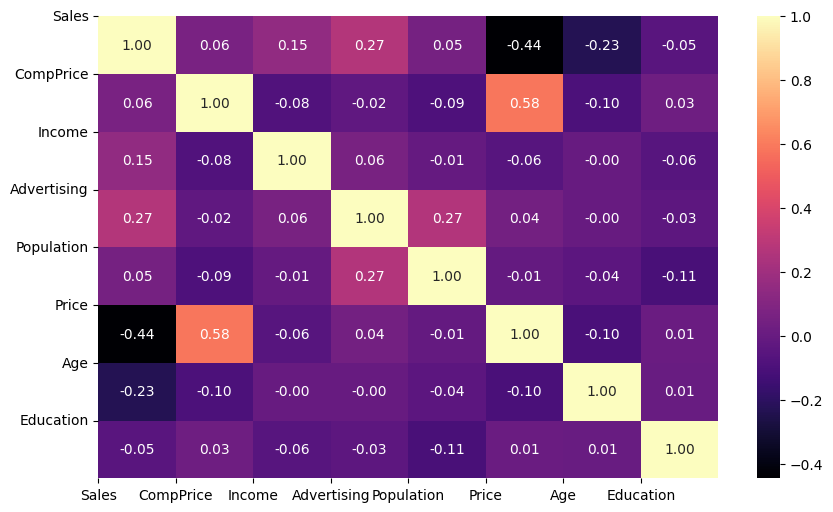

In [ ]:
# Correlation analysis for data
corr = df2.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(10, 6))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='magma', annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()


In [ ]:
# Converting Target variable 'Sales' into categories Low, Medium and High.
df2['Sales'] = pd.cut(x=df2['Sales'],bins=[0, 6, 12, 17], labels=['Low','Medium', 'High'], right = False)
df2['Sales']

0      Medium
1      Medium
2      Medium
3      Medium
4         Low
        ...  
395      High
396    Medium
397    Medium
398       Low
399    Medium
Name: Sales, Length: 400, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

In [ ]:
df2['Sales'].value_counts()

Medium    243
Low       130
High       27
Name: Sales, dtype: int64

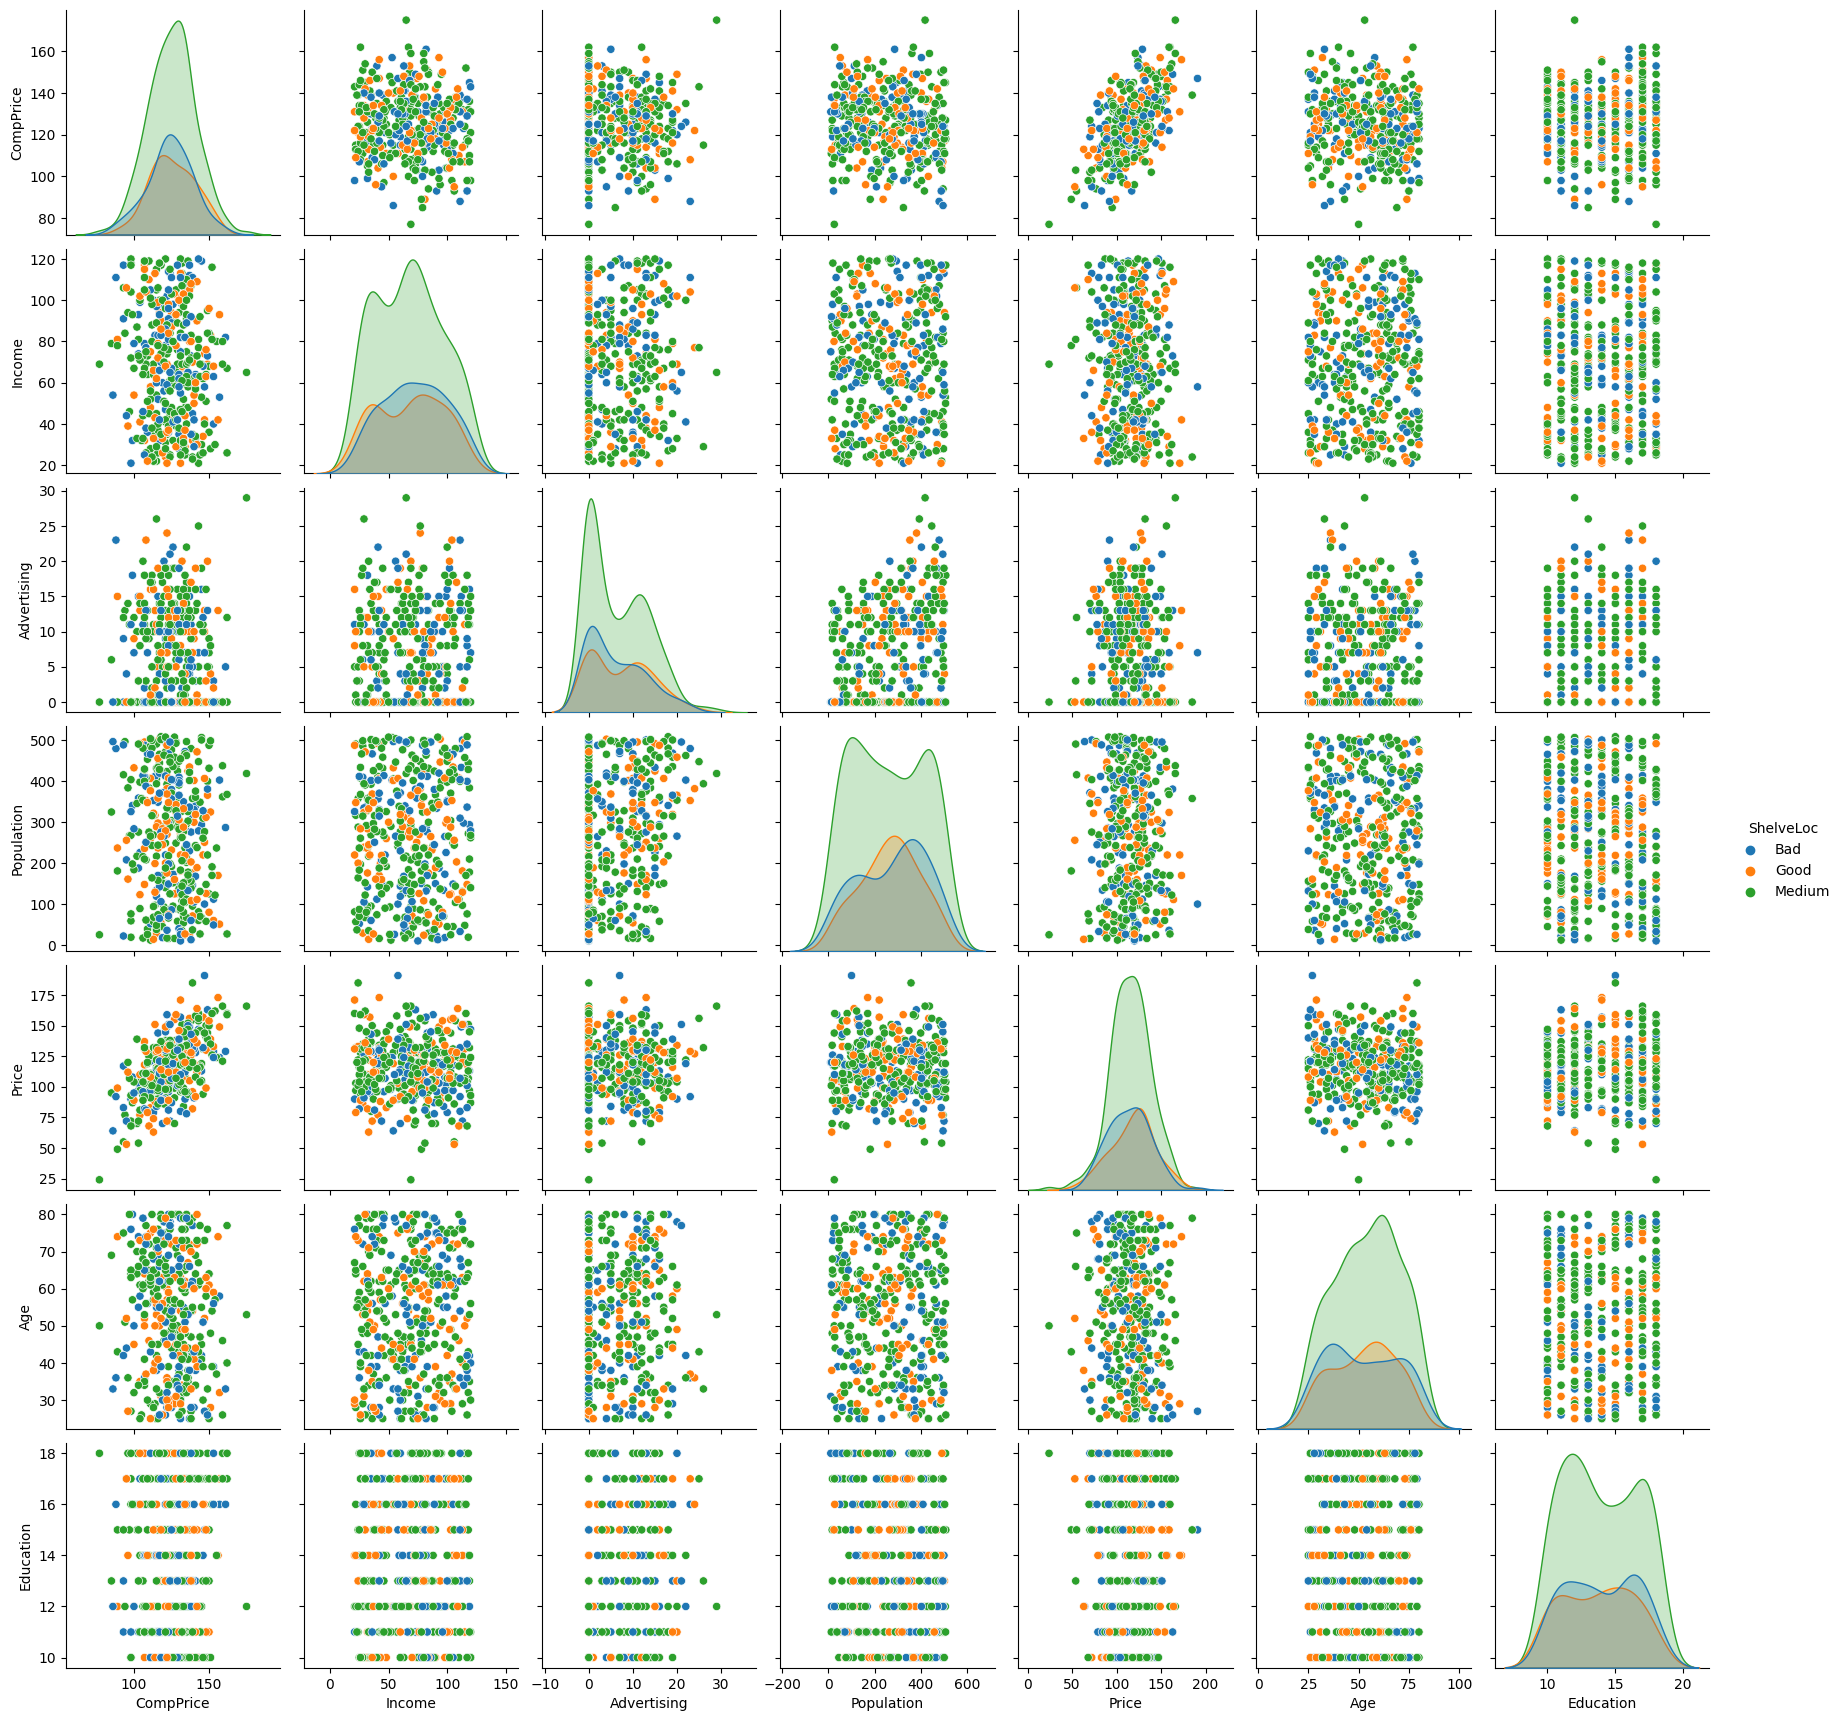

In [ ]:
# let's plot pair plot to visualise the attributes all at once
sns.pairplot(data=df2, hue = 'ShelveLoc')

In [ ]:
# Converting categorical into numerical
#get all categorical columns
cat_columns = df2.select_dtypes(['object']).columns

#convert all categorical columns to numeric
df2[cat_columns] = df2[cat_columns].apply(lambda x: pd.factorize(x)[0])

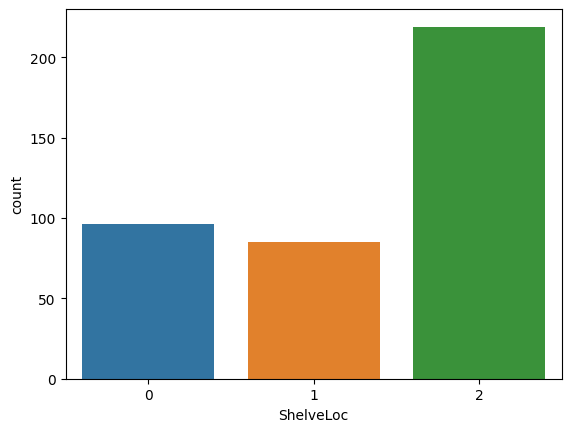

In [ ]:
# checking count of categories for categorical columns colums
sns.countplot(x=df2['ShelveLoc'])
plt.show()

#sns.countplot(x=df2['Urban'])
#plt.show()

#sns.countplot(x=df2['US'])
#plt.show()

<Axes: xlabel='Sales', ylabel='count'>

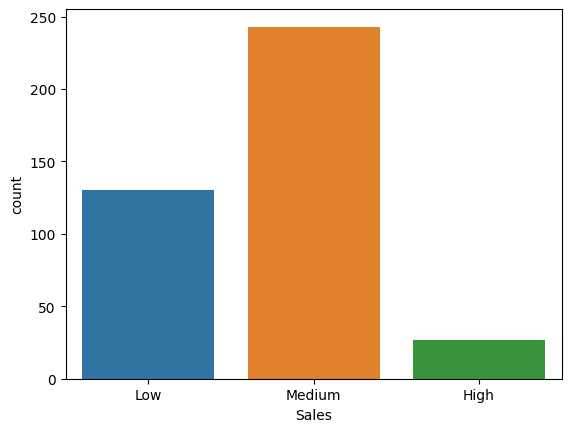

In [ ]:
sns.countplot(x=df2['Sales'])

In [ ]:
# Converting other attributes into categories
df2['CompPrice'] = pd.cut(x=df2['CompPrice'],bins=[77, 100, 133, 176], labels=['Low','Medium', 'High'], right = False)

df2['Income'] = pd.cut(x=df2['Income'],bins=[21, 46, 71, 121], labels=['Low','Medium', 'High'], right = False)

df2['Advertising'] = pd.cut(x=df2['Advertising'],bins=[0, 10, 20, 30], labels=['Low','Medium', 'High'], right = False)

df2['Population'] = pd.cut(x=df2['Population'],bins=[10, 170, 340, 510], labels=['Low','Medium', 'High'], right = False)

df2['Price'] = pd.cut(x=df2['Price'],bins=[24, 80, 136, 192], labels=['Low','Medium', 'High'], right = False)

df2['Age'] = pd.cut(x=df2['Age'],bins=[25, 45, 60, 81], labels=['Low','Medium', 'High'], right = False)

df2['Education'] = pd.cut(x=df2['Education'],bins=[10, 12.5, 15, 19], labels=['Low','Medium', 'High'], right = False)

In [ ]:
df2.head()

Sales CompPrice  Income Advertising Population   Price  ShelveLoc     Age  \
0  Medium      High    High      Medium     Medium  Medium          0     Low   
1  Medium    Medium  Medium      Medium     Medium  Medium          1    High   
2  Medium    Medium     Low      Medium     Medium  Medium          2  Medium   
3  Medium    Medium    High         Low       High  Medium          2  Medium   
4     Low      High  Medium         Low       High  Medium          0     Low   

  Education  Urban_Yes  US_Yes  
0      High          1       1  
1       Low          1       1  
2       Low          1       1  
3    Medium          1       1  
4    Medium          1       0

In [ ]:
#encoding categorical data
label_encoder = preprocessing.LabelEncoder()

df2['Sales'] = label_encoder.fit_transform(df2['Sales'])
df2['CompPrice'] = label_encoder.fit_transform(df2['CompPrice'])
df2['Income'] = label_encoder.fit_transform(df2['Income'])
df2['Advertising'] = label_encoder.fit_transform(df2['Advertising'])
df2['Population'] = label_encoder.fit_transform(df2['Population'])
df2['Price'] = label_encoder.fit_transform(df2['Price'])
df2['ShelveLoc'] = label_encoder.fit_transform(df2['ShelveLoc'])
df2['Age'] = label_encoder.fit_transform(df2['Age'])
df2['Education'] = label_encoder.fit_transform(df2['Education'])
#df2['Urban'] = label_encoder.fit_transform(df2['Urban'])
#df2['US'] = label_encoder.fit_transform(df2['US'])

df2

Sales  CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0        2          0       0            2           2      2          0    1   
1        2          2       2            2           2      2          1    0   
2        2          2       1            2           2      2          2    2   
3        2          2       0            1           0      2          2    2   
4        1          0       2            1           0      2          0    1   
..     ...        ...     ...          ...         ...    ...        ...  ...   
395      0          0       0            2           2      2          1    1   
396      2          0       1            1           1      2          2    2   
397      2          0       1            2           0      0          2    1   
398      1          2       0            1           2      2          0    2   
399      2          0       1            1           1      2          1    2   

     Education  Urban_Yes  US_Yes  
0            0          1       1  
1            1          1       1  
2            1          1       1  
3            2          1       1  
4            2          1       0  
..         ...        ...     ...  
395          2          1       1  
396          1          0       1  
397          0          1       1  
398          1          1       1  
399          0          1       1  

[400 rows x 11 columns]

In [ ]:
# Dividing data into independent variables and dependent variable
X = df2.drop('Sales', axis = 1)
y = df2['Sales']

In [ ]:
X

CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0            0       0            2           2      2          0    1   
1            2       2            2           2      2          1    0   
2            2       1            2           2      2          2    2   
3            2       0            1           0      2          2    2   
4            0       2            1           0      2          0    1   
..         ...     ...          ...         ...    ...        ...  ...   
395          0       0            2           2      2          1    1   
396          0       1            1           1      2          2    2   
397          0       1            2           0      0          2    1   
398          2       0            1           2      2          0    2   
399          0       1            1           1      2          1    2   

     Education  Urban_Yes  US_Yes  
0            0          1       1  
1            1          1       1  
2            1          1       1  
3            2          1       1  
4            2          1       0  
..         ...        ...     ...  
395          2          1       1  
396          1          0       1  
397          0          1       1  
398          1          1       1  
399          0          1       1  

[400 rows x 10 columns]

In [ ]:
y

0      2
1      2
2      2
3      2
4      1
      ..
395    0
396    2
397    2
398    1
399    2
Name: Sales, Length: 400, dtype: int64

In [ ]:
# Splitting data into training and testing data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.33, random_state= 42)

In [ ]:
x_train

CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
258          2       1            1           2      2          0    0   
177          0       0            1           1      2          2    1   
119          2       0            1           1      2          2    0   
194          2       0            2           0      2          2    2   
229          1       0            1           0      1          2    1   
..         ...     ...          ...         ...    ...        ...  ...   
71           0       2            2           1      0          2    2   
106          2       1            1           2      0          2    0   
270          2       1            1           2      2          1    1   
348          2       0            0           0      2          1    2   
102          2       1            1           1      2          2    0   

     Education  Urban_Yes  US_Yes  
258          2          0       0  
177          0          1       1  
119          1          1       1  
194          1          1       1  
229          0          0       0  
..         ...        ...     ...  
71           0          0       1  
106          0          0       0  
270          1          1       0  
348          1          1       1  
102          0          0       0  

[268 rows x 10 columns]

In [ ]:
x_test

CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
209          1       1            2           2      2          0    0   
280          2       0            2           0      0          0    2   
33           2       1            2           2      2          1    2   
210          2       1            1           0      2          0    2   
93           0       1            1           1      2          2    2   
..         ...     ...          ...         ...    ...        ...  ...   
332          2       1            0           0      2          2    0   
167          2       0            1           2      2          2    0   
245          2       1            1           2      2          1    2   
311          0       2            2           2      2          0    2   
145          0       2            2           1      2          2    2   

     Education  Urban_Yes  US_Yes  
209          1          0       1  
280          1          1       1  
33           0          1       1  
210          2          0       1  
93           0          1       0  
..         ...        ...     ...  
332          1          1       1  
167          2          1       0  
245          1          0       1  
311          2          1       1  
145          0          1       1  

[132 rows x 10 columns]

In [ ]:
y_train

258    1
177    2
119    2
194    2
229    2
      ..
71     2
106    1
270    2
348    0
102    1
Name: Sales, Length: 268, dtype: int64

In [ ]:
y_test

209    1
280    1
33     2
210    1
93     2
      ..
332    1
167    2
245    2
311    2
145    2
Name: Sales, Length: 132, dtype: int64

###Building model based on C5.0 Algorithm

In [ ]:
model_c5 = DecisionTreeClassifier(criterion = 'entropy', max_depth= 3)
model_c5.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

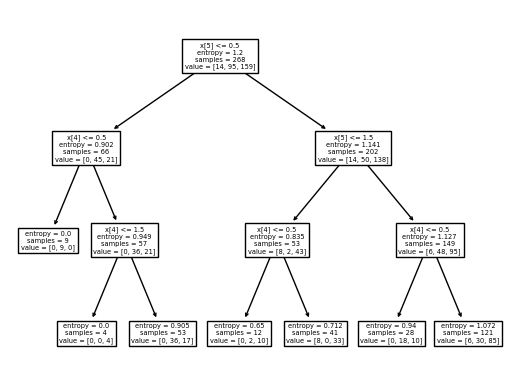

In [ ]:
# Plotting Decision tree
tree.plot_tree(model_c5);

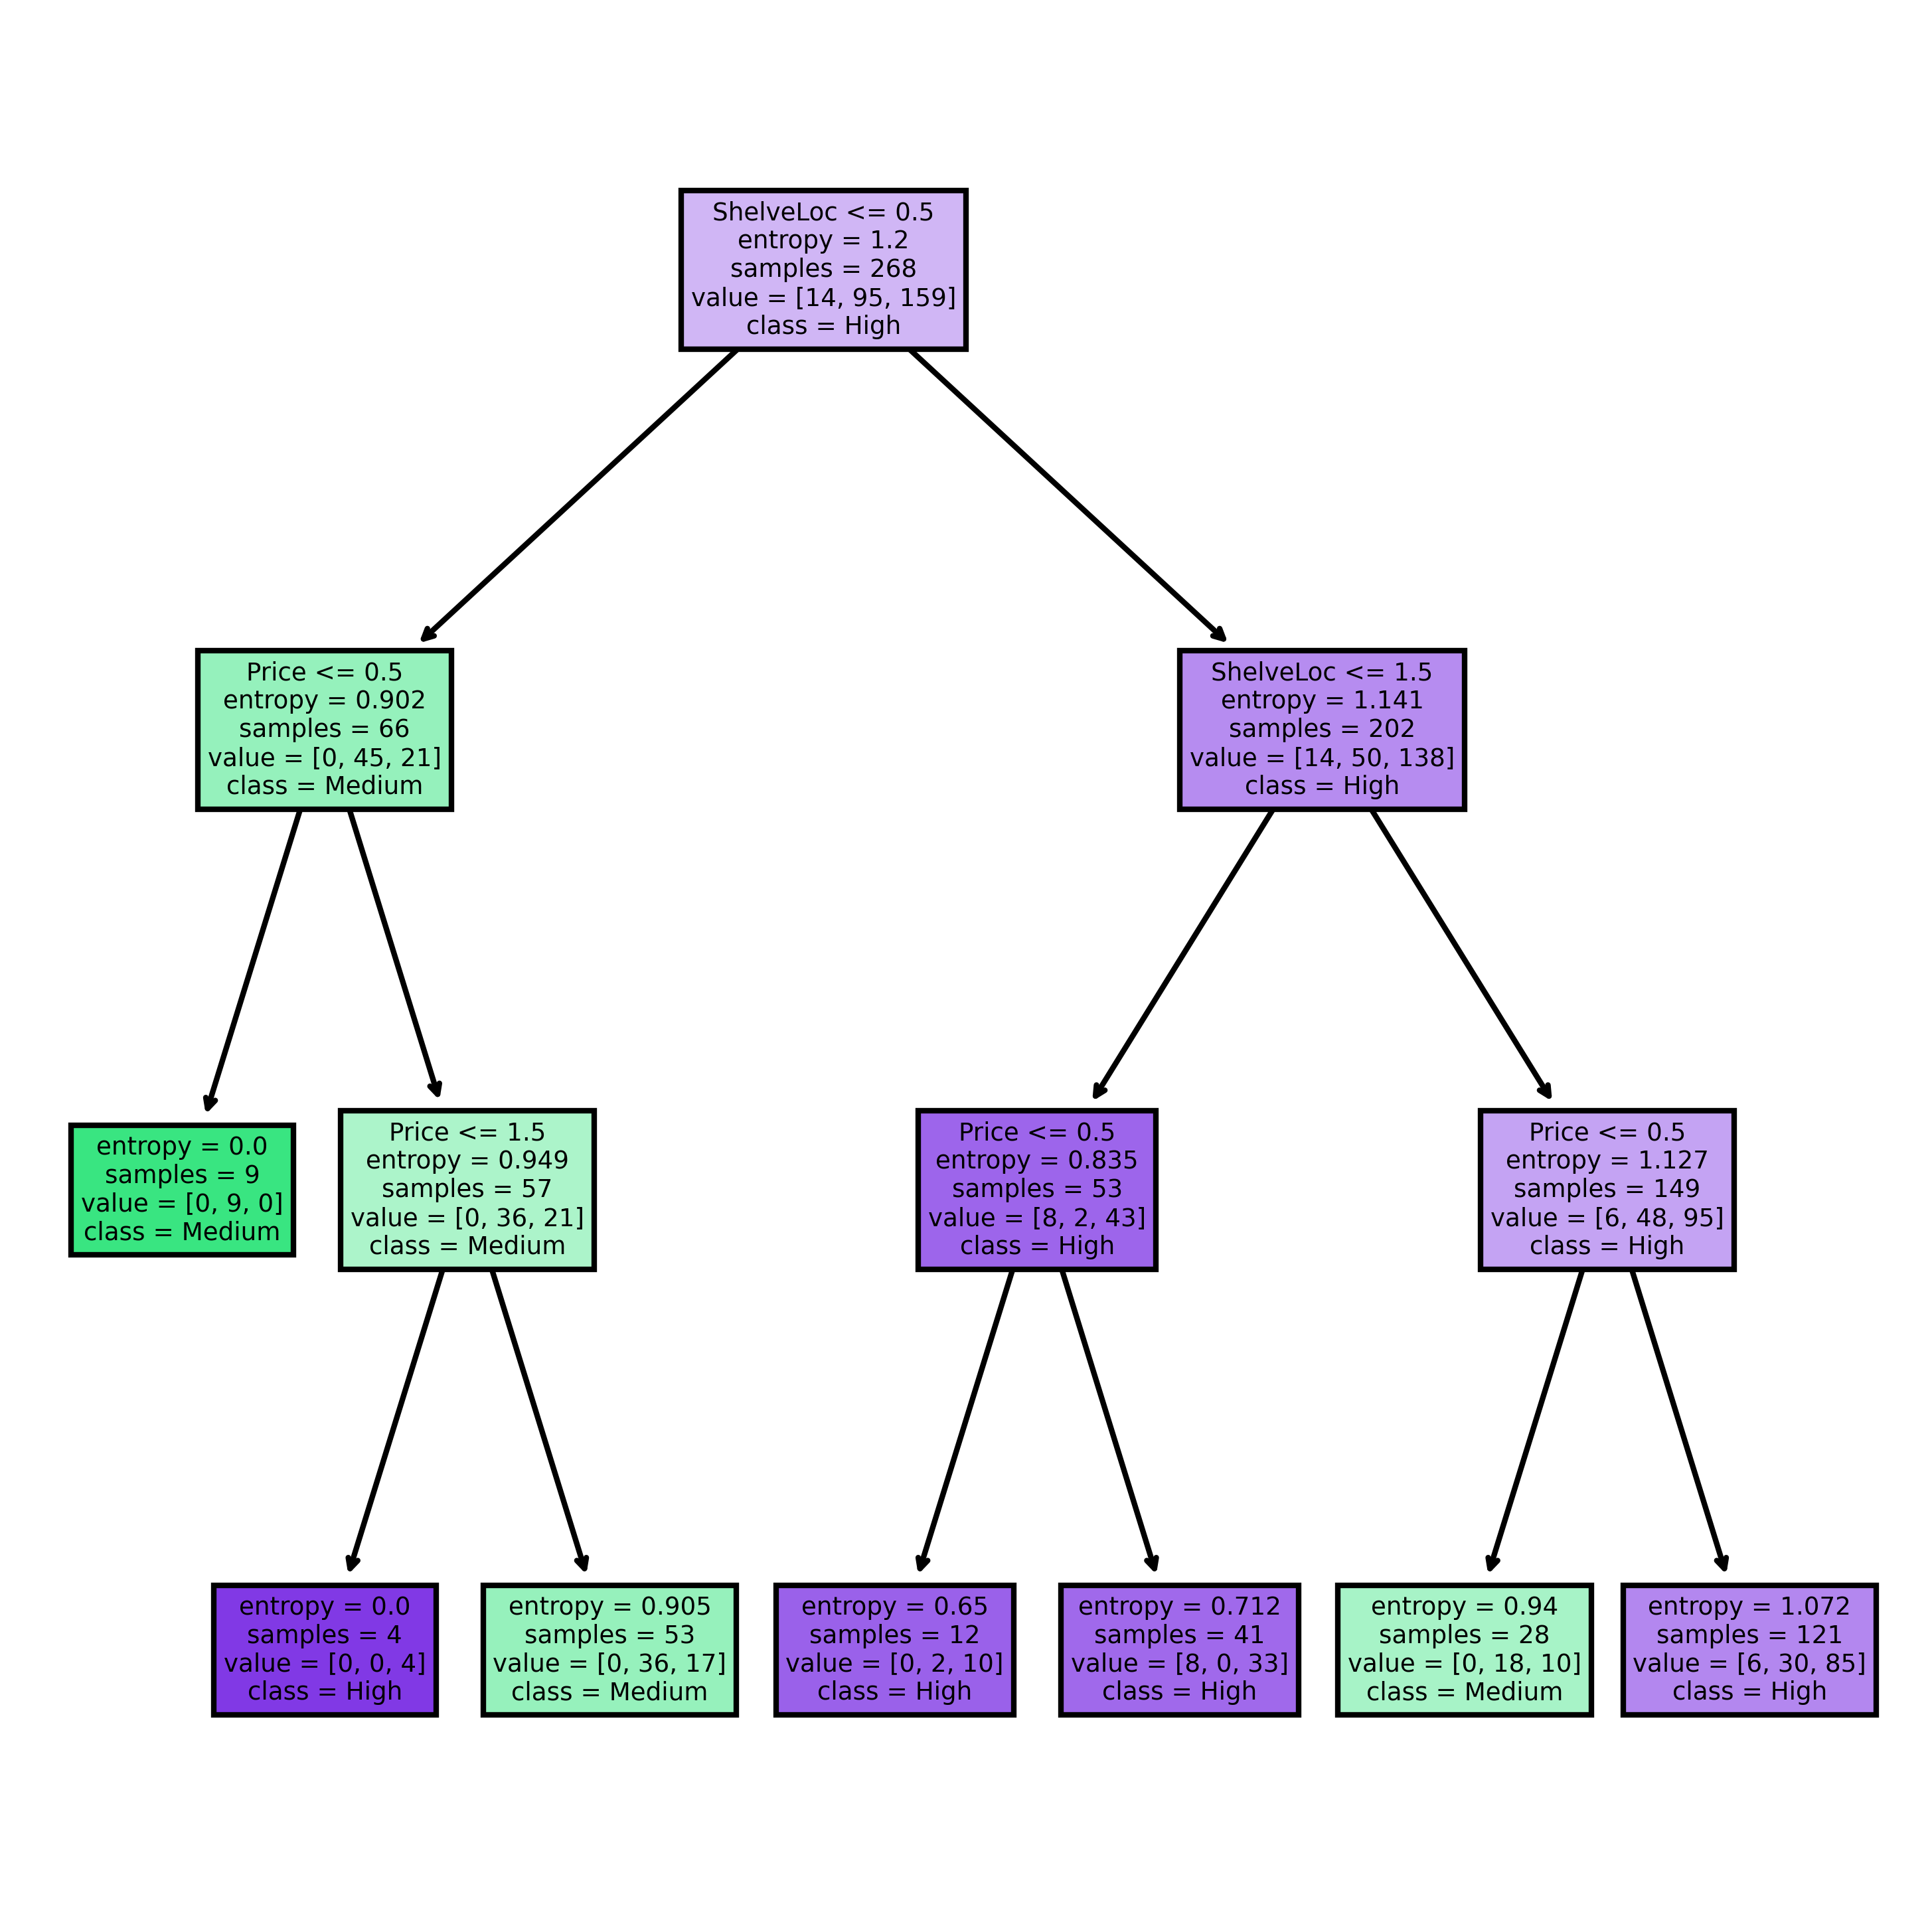

In [ ]:
fn=['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US']
cn=['Low', 'Medium', 'High']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,6), dpi=600)
tree.plot_tree(model_c5,
               feature_names = fn,
               class_names=cn,
               filled = True);

In [ ]:
# Predicting Data
preds = model_c5.predict(x_test)

In [ ]:
preds


array([1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2,
       2, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2])

In [ ]:
# Creating cross tables for checking model
pd.crosstab(y_test, preds)

col_0   1   2
Sales        
0       0  13
1      22  13
2      16  68

In [ ]:
# Checking accuracy of model
model_c5.score(x_test, y_test)

0.6818181818181818

###Building model based on CART Algorithm

In [ ]:
model_CART = DecisionTreeClassifier(criterion = 'gini', max_depth= 3)
model_CART.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

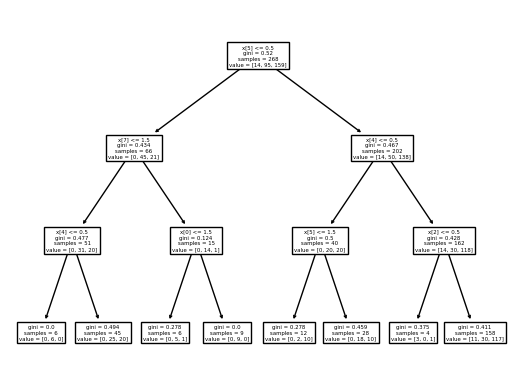

In [ ]:
# Plotting Decision tree
tree.plot_tree(model_CART);

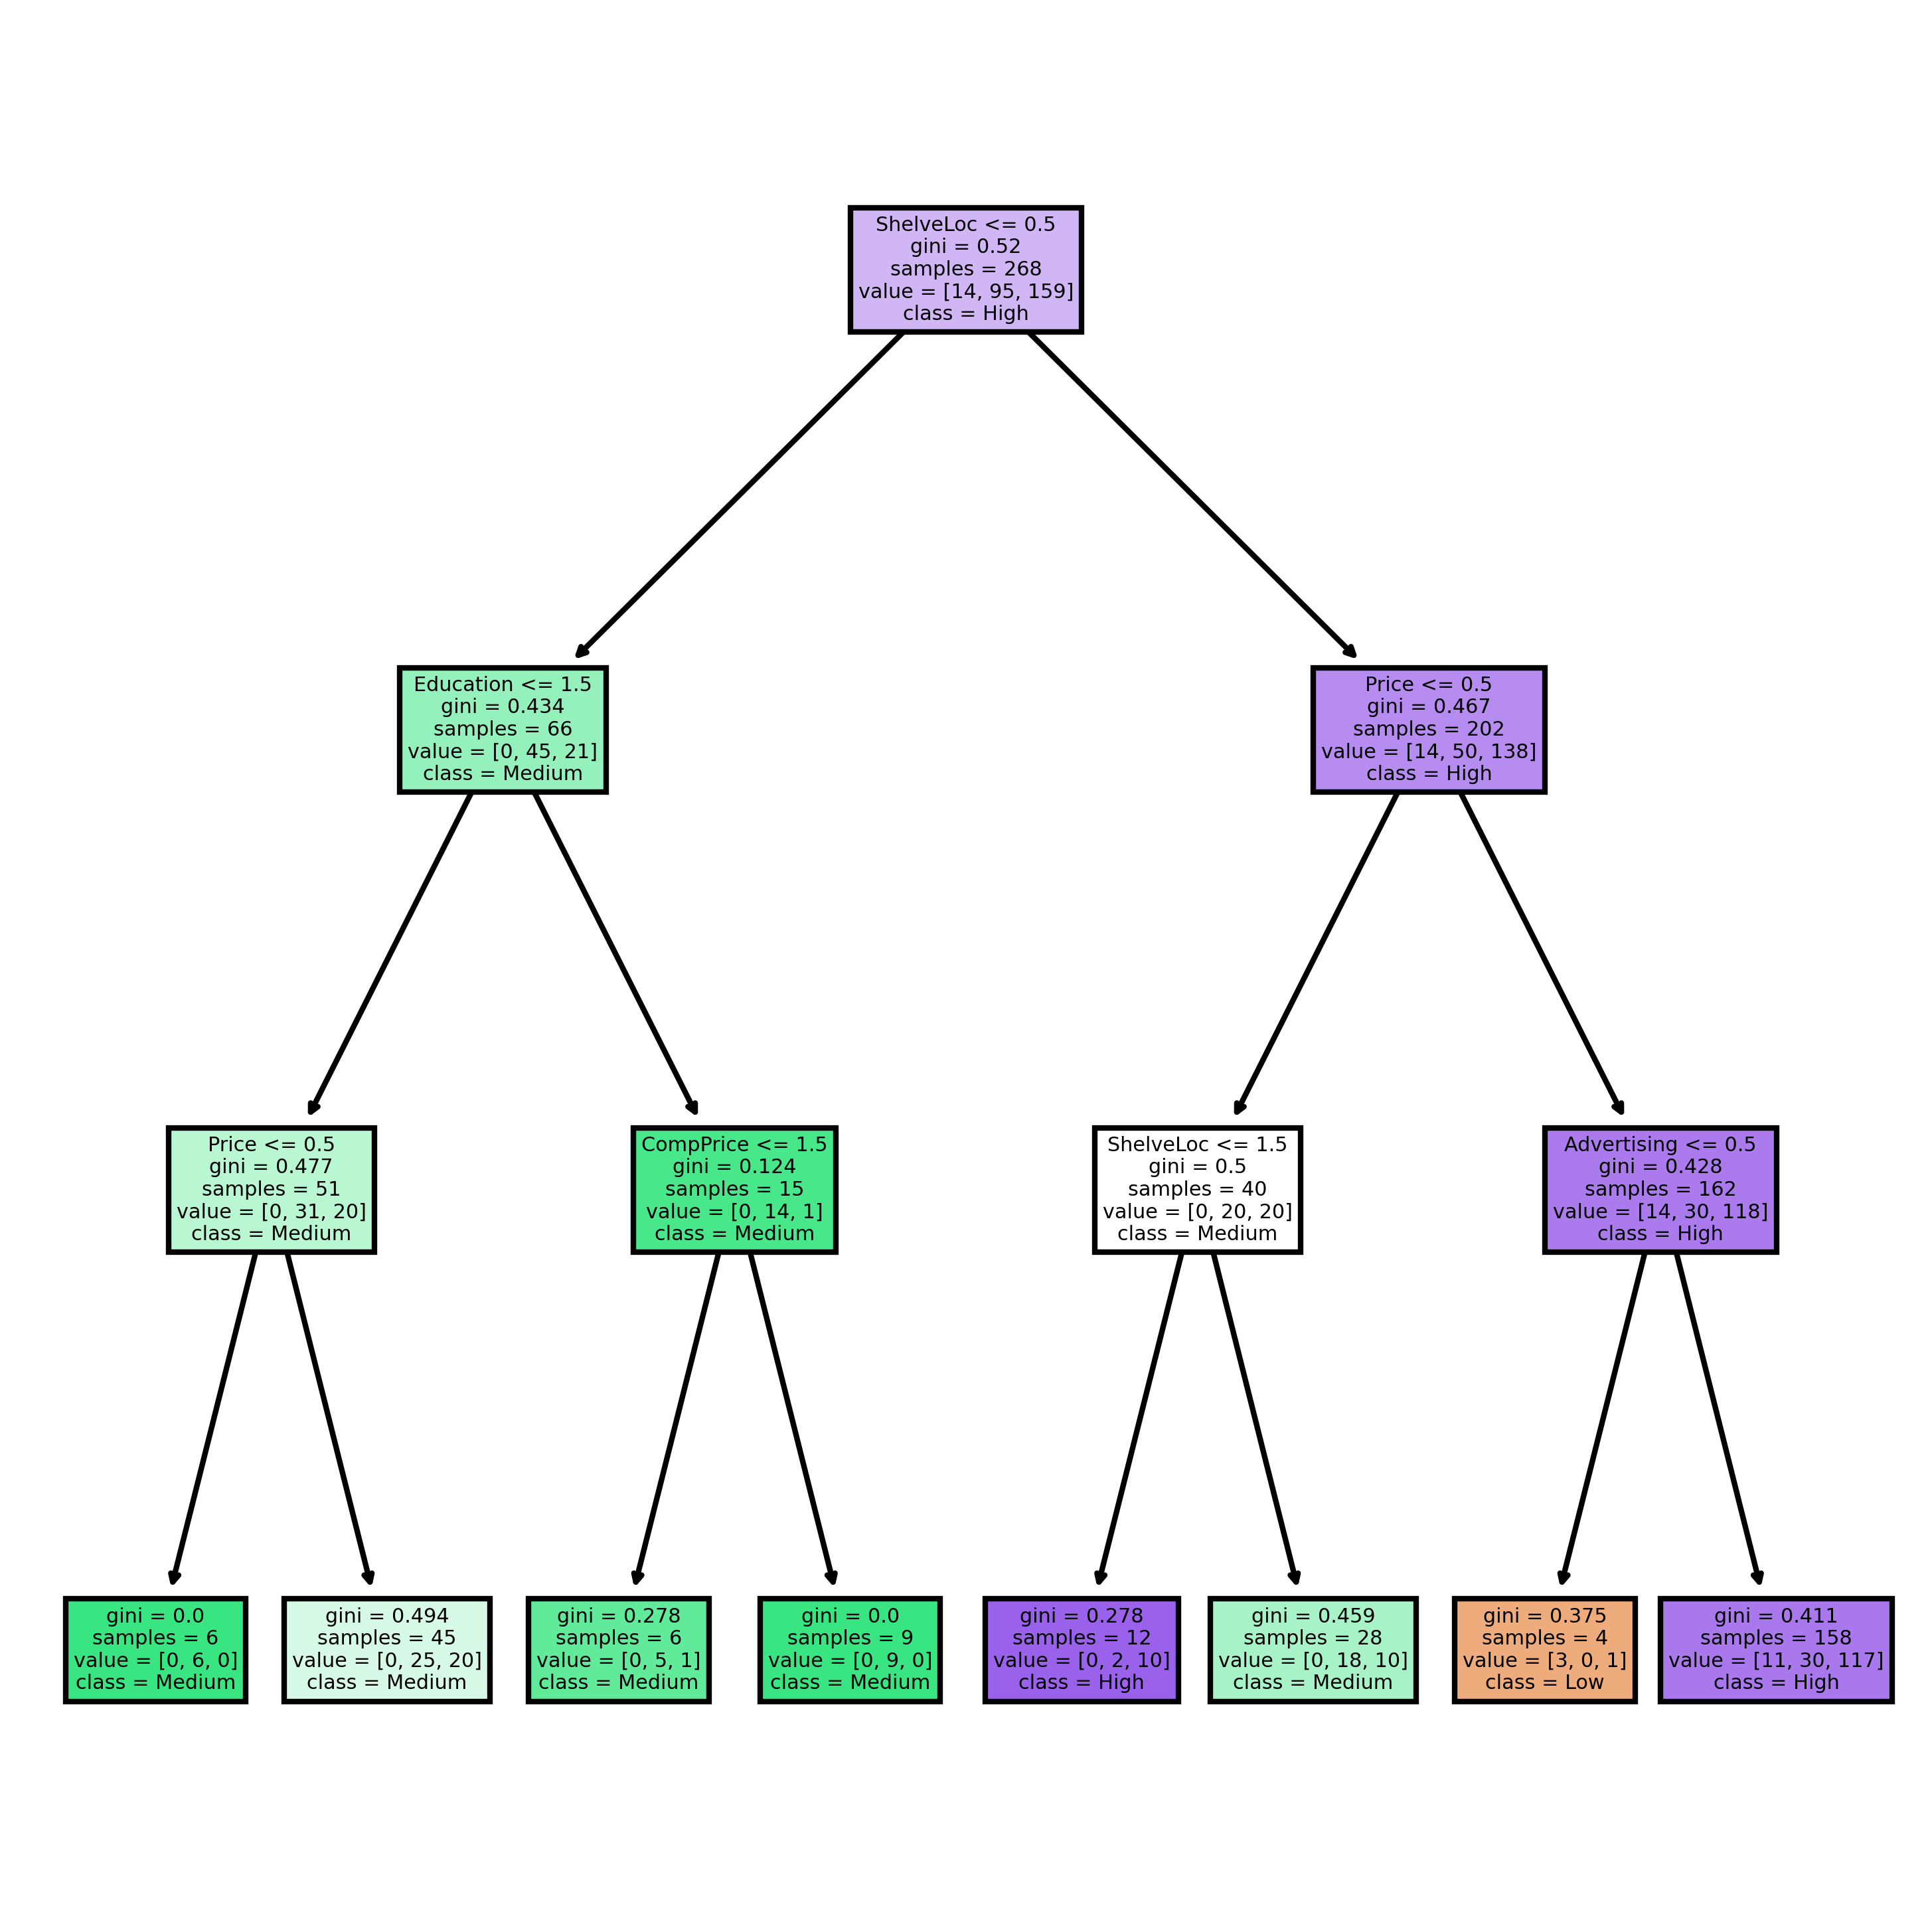

In [ ]:
fn=['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US']
cn=['Low', 'Medium', 'High']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,6), dpi=600)
tree.plot_tree(model_CART,
               feature_names = fn,
               class_names=cn,
               filled = True);

In [ ]:
# Predicting Data
preds = model_CART.predict(x_test)
pd.Series(preds).value_counts()

2    89
1    40
0     3
dtype: int64

In [ ]:
preds

array([1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2,
       2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 0, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 1, 1, 1, 2, 0, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 1, 2])

In [ ]:
# Creating cross tables for checking model
pd.crosstab(y_test, preds)

col_0  0   1   2
Sales           
0      0   0  13
1      1  22  12
2      2  18  64

In [ ]:
# Checking accuracy of model
model_CART.score(x_test, y_test)

0.6515151515151515

###Building Decision Tree Classifier (CART) using Gini Criteria

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [ ]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [ ]:
#Prediction and computing the accuracy
pred=model_gini.predict(x_test)
np.mean(preds==y_test)

0.6515151515151515

###Decision Tree Regression Example

In [ ]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [ ]:
array = df2.values
X = array[:,0:3]
y = array[:,3]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [ ]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
#Find the accuracy
model.score(X_test,y_test)

0.00638635421431466